In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive    
 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


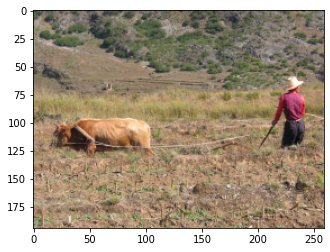

In [ ]:
img=cv2.imread('/content/drive/MyDrive/hi.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
def normm(img1,img2):
    if (img1.std()==0 or img2.std()==0):
        return 0
    up=np.mean((img1-img1.mean())*(img2-img2.mean()))
    down=(img1.std()*img2.std())
    return up/down
def corr_match(img1,img2,xx):
    mp1=[]
    mp2=[]
    d={}
    l=0
    x,y=xx[0],xx[1]
    #img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
    for i in range((img1.shape[0]-x)):
        for j in range((img1.shape[1]-y)):
            img=img1[i:i+x,j:j+y].copy()
            corr=0
            mp1.append((i,j))
            mp2.append((0,0))
            for ii in range((img2.shape[0]-x)):
                for jj in range((img2.shape[1]-y)):
                    temp=img2[ii:ii+x,jj:jj+y].copy()
                    corr_temp=normm(img,temp)
                    if(corr_temp>corr):
                        mp2[l]=(ii,jj)
                        corr=corr_temp
            d[i,j]=mp2[l]
            l=l+1
    return d
def corr_match1(img1,img2,xx):
    mp1=[]
    mp2=[]
    d={}
    l=0
    x,y=xx[0],xx[1]
    #img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
    for i in range((img1.shape[0]-x)):
        for j in range((img1.shape[1]-y)):
            img=img1[i:i+x,j:j+y].copy()
            corr=0
            mp1.append((i,j))
            mp2.append((0,0))
            for ii in range((img2.shape[0]-x)):
                for jj in range((img2.shape[1]-y)):
                    temp=img2[ii:ii+x,jj:jj+y].copy()
                    corr_temp=normm(img,temp)
                    if(corr_temp>corr):
                        mp2[l]=(ii,jj)
                        corr=corr_temp
            d[i,j]=mp2[l]
            l=l+1
    return d
def corr_match2(img1,img2,xx):
    mp1=[]
    mp2=[]
    d={}
    l=0
    x,y=xx[0],xx[1]
    #img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
    for i in range((img1.shape[0]-x)):
        for j in range((img1.shape[1]-y)):
            img=img1[i:i+x,j:j+y].copy()
            corr=0
            mp1.append((i,j))
            mp2.append((0,0))
            for ii in range((img2.shape[0]-x)):
                for jj in range((img2.shape[1]-y)):
                    temp=img2[ii:ii+x,jj:jj+y].copy()
                    corr_temp=normm(img,temp)
                    if(corr_temp>corr):
                        mp2[l]=(ii,jj)
                        corr=corr_temp
            d[mp2[l]]=(i,j)
            l=l+1
    return d

In [ ]:
from numpy.linalg import norm
def PP(a,l=5,s=5):
    x = np.arange(0,a.shape[1]-s+1,1)
    y = np.arange(0,a.shape[0]-s+1,1)
    x,y = np.meshgrid(x,y)
    return x.flatten(),y.flatten()
def patches(a,x,y,l=5):
    g = len(x) ; lis = np.asarray([])
    for i in range(g):
        if i==0:
            lis=a[y[i]:y[i]+l,x[i]:x[i]+l].flatten()
        if i!=0:
            lis=np.vstack((lis,a[y[i]:y[i]+l,x[i]:x[i]+l].flatten()))
    return lis
def NCC_best_patch1(a,b,l=5,s=5):
    
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    d={}
    lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1) ; lis1 = lis1/(norm(lis1,axis=1).reshape(-1,1)+0.1)
    lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1) ; lis2 = lis2/(norm(lis2,axis=1).reshape(-1,1)+0.1)
    arr = lis1@lis2.T
    ans = np.argmax(arr,axis=1)
    for i in range(len(x1)):
        d[(y1[i],x1[i])]=(y2[ans[i]],x2[ans[i]])
    return d
def NCC_best_patch2(a,b,l=5,s=5):
    
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    d={}
    lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1) ; lis1 = lis1/(norm(lis1,axis=1).reshape(-1,1)+0.1)
    lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1) ; lis2 = lis2/(norm(lis2,axis=1).reshape(-1,1)+0.1)
    arr = lis1@lis2.T    
    ans = np.argmax(arr,axis=1)
    for i in range(len(x1)):
        d[(y2[ans[i]],x2[ans[i]])]=(y1[i],x1[i])
    return d

In [ ]:
img1=cv2.imread('./hi.png')
img1=cv2.resize(img1,(30,30))
img2=cv2.resize(img1,(30,30))
d1=corr_match1(img1,img2,[7,7])
d2=NCC_best_patch1(img1,img2,7,7)
print(len(d1),len(d2))

529 576


In [ ]:
print(d1,'\n',d2)

{(0, 0): (0, 0), (0, 1): (0, 1), (0, 2): (0, 2), (0, 3): (0, 3), (0, 4): (0, 4), (0, 5): (0, 5), (0, 6): (0, 6), (0, 7): (0, 7), (0, 8): (0, 8), (0, 9): (0, 9), (0, 10): (0, 10), (0, 11): (0, 11), (0, 12): (0, 12), (0, 13): (0, 13), (0, 14): (0, 14), (0, 15): (0, 15), (0, 16): (0, 16), (0, 17): (0, 17), (0, 18): (0, 18), (0, 19): (0, 19), (0, 20): (0, 20), (0, 21): (0, 21), (0, 22): (0, 22), (1, 0): (1, 0), (1, 1): (1, 1), (1, 2): (1, 2), (1, 3): (1, 3), (1, 4): (1, 4), (1, 5): (1, 5), (1, 6): (1, 6), (1, 7): (1, 7), (1, 8): (1, 8), (1, 9): (1, 9), (1, 10): (1, 10), (1, 11): (1, 11), (1, 12): (1, 12), (1, 13): (1, 13), (1, 14): (1, 14), (1, 15): (1, 15), (1, 16): (1, 16), (1, 17): (1, 17), (1, 18): (1, 18), (1, 19): (1, 19), (1, 20): (1, 20), (1, 21): (1, 21), (1, 22): (1, 22), (2, 0): (2, 0), (2, 1): (2, 1), (2, 2): (2, 2), (2, 3): (2, 3), (2, 4): (2, 4), (2, 5): (2, 5), (2, 6): (2, 6), (2, 7): (2, 7), (2, 8): (2, 8), (2, 9): (2, 9), (2, 10): (2, 10), (2, 11): (2, 11), (2, 12): (2, 12

In [ ]:
#print(match)

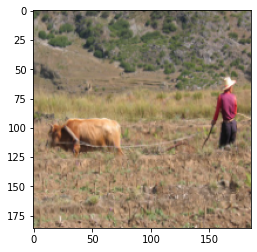

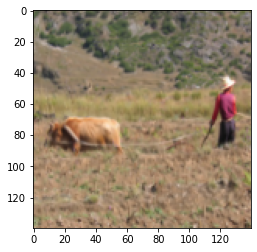

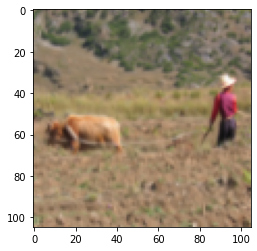

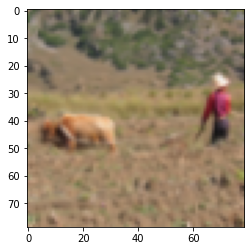

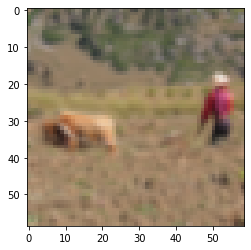

In [ ]:
S=cv2.imread('/content/drive/MyDrive/hi.png')
S=cv2.resize(S,(200,200))
S=cv2.cvtColor(S,cv2.COLOR_BGR2RGB)
T=S.copy()
#window size=7*7 always
for _ in range(20):
    T=cv2.resize(S,None,fx=0.93,fy=0.93)
    match1=NCC_best_patch1(T,S)
    match2=NCC_best_patch2(S,T)
    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            cnt1=0
            sum1=np.array([0,0,0])
            cnt2=0
            sum2=np.array([0,0,0])
            for x in range(5): 
                for y in range(5):
                    try :
                        here=match1[(i-x,j-y)]
                        sum1=sum1+S[here[0]+x,here[1]+y]
                        cnt1=cnt1+1
                    except :
                        continue
            for x in range(5):
                for y in range(5):
                    try :
                        here=match2[(i-x,j-y)]
                        sum2=sum2+S[here[0]+x,here[1]+y]
                        cnt2=cnt2+1
                    except :
                        continue
            T[i,j]=np.array((sum1+sum2)/(cnt1+cnt2),int)
    if(_%4==0):
      plt.imshow(T)
      plt.show()
    S=T.copy()